# Fashion Dataset Classification using CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(f"Training set size: {train_images.shape[0]} images, each of shape {train_images.shape[1:]}")
print(f"Test set size: {test_images.shape[0]} images, each of shape {test_images.shape[1:]}")
print(f"Number of unique classes: {len(np.unique(train_labels))}")


Training set size: 60000 images, each of shape (28, 28)
Test set size: 10000 images, each of shape (28, 28)
Number of unique classes: 10


In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


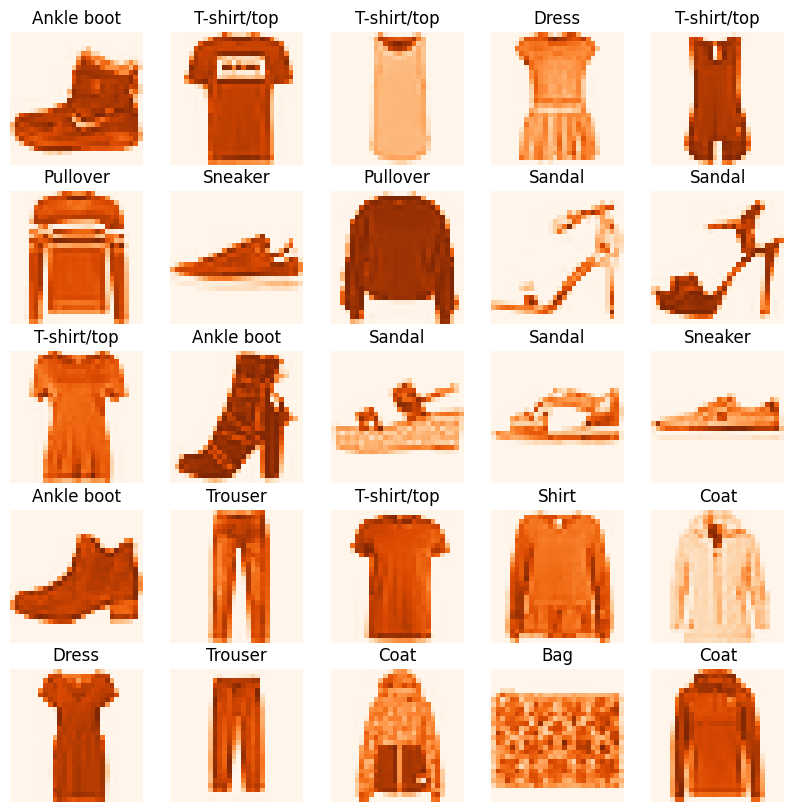

In [6]:
def plot_sample_images(images, labels, class_names, n=25):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i], cmap='Oranges')
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

plot_sample_images(train_images, train_labels, class_names)


C:\Users\Shlok Sonkusare\AppData\Local\Temp\ipykernel_20796\524493374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='Oranges')


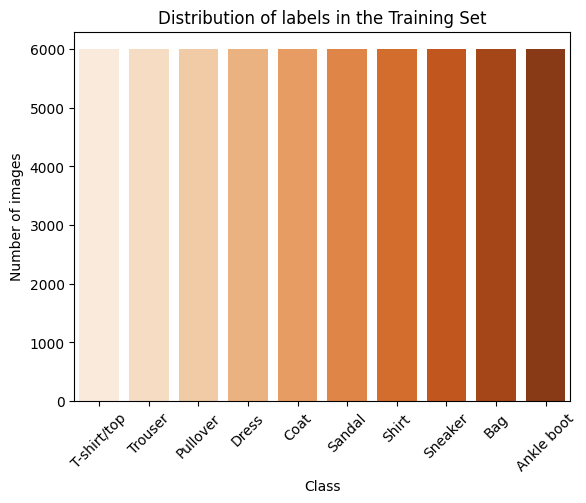

In [7]:
label_counts = pd.Series(train_labels).value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Oranges')
plt.title("Distribution of labels in the Training Set")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.show()

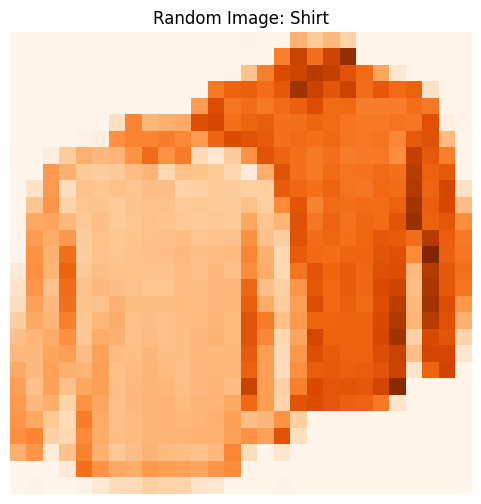

In [8]:
random_index = np.random.randint(0, train_images.shape[0])
plt.figure(figsize=(6, 6))
plt.imshow(train_images[random_index], cmap='Oranges')
plt.title(f"Random Image: {class_names[train_labels[random_index]]}")
plt.axis('off')
plt.show()

# Model Evaluation using Leaky ReLU function

In [9]:

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') 
])


In [10]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [11]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10


c:\Users\Shlok Sonkusare\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 19s 10ms/step - loss: 0.5021 - accuracy: 0.8157 - val_loss: 0.3675 - val_accuracy: 0.8705
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3223 - accuracy: 0.8808 - val_loss: 0.3247 - val_accuracy: 0.8833
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2788 - accuracy: 0.8979 - val_loss: 0.2903 - val_accuracy: 0.8967
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2484 - accuracy: 0.9086 - val_loss: 0.2832 - val_accuracy: 0.9008
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2257 - accuracy: 0.9173 - val_loss: 0.2606 - val_accuracy: 0.9052
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2055 - accuracy: 0.9248 - val_loss: 0.2720 - val_accuracy: 0.9050
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1903 - accuracy: 0.9290 - val_loss: 0.2653 - val_accura

In [12]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(test_labels, y_pred_classes)
class_accuracies = cm.diagonal() / cm.sum(axis=1)

print("Class-wise Accuracy:")
for i, accuracy in enumerate(class_accuracies):
    print(f"Class {class_names[i]} Accuracy: {accuracy:.4f}")

313/313 [==============================] - 2s 5ms/step
Class-wise Accuracy:
Class T-shirt/top Accuracy: 0.8730
Class Trouser Accuracy: 0.9810
Class Pullover Accuracy: 0.8570
Class Dress Accuracy: 0.8930
Class Coat Accuracy: 0.8740
Class Sandal Accuracy: 0.9790
Class Shirt Accuracy: 0.7390
Class Sneaker Accuracy: 0.9600
Class Bag Accuracy: 0.9790
Class Ankle boot Accuracy: 0.9710


In [13]:
predictions = model.predict(test_images)

predictions = np.argmax(predictions, axis=1)

print("\nClassification Report:")
print(classification_report(test_labels, predictions, target_names=class_names))


313/313 [==============================] - 2s 5ms/step

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.87      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.86      0.87      1000
       Dress       0.94      0.89      0.91      1000
        Coat       0.85      0.87      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.74      0.74      0.74      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



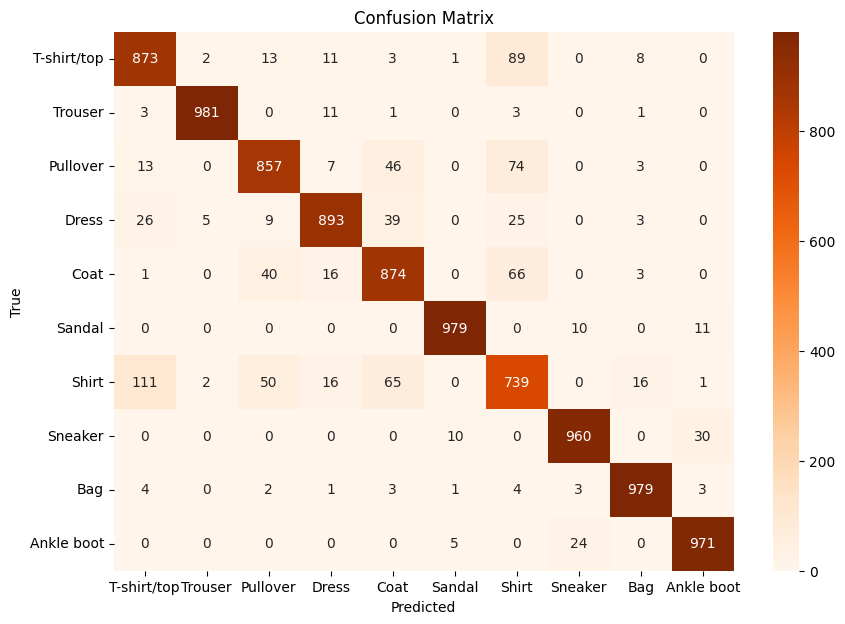

In [14]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Class-wise Accuracy:
Class T-shirt/top Accuracy: 0.8730
Class Trouser Accuracy: 0.9810
Class Pullover Accuracy: 0.8570
Class Dress Accuracy: 0.8930
Class Coat Accuracy: 0.8740
Class Sandal Accuracy: 0.9790
Class Shirt Accuracy: 0.7390
Class Sneaker Accuracy: 0.9600
Class Bag Accuracy: 0.9790
Class Ankle boot Accuracy: 0.9710


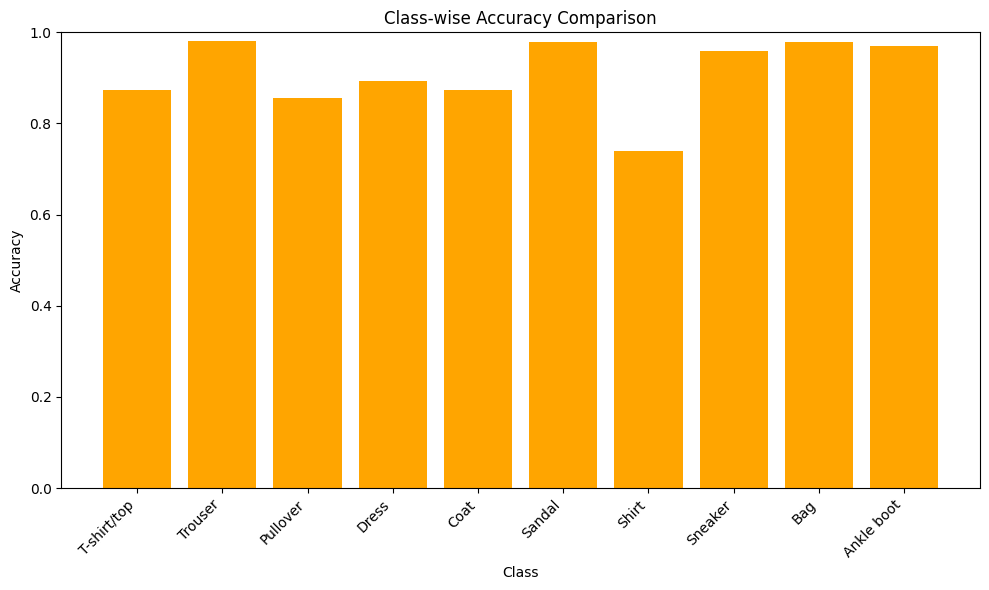

In [15]:
class_accuracies = cm.diagonal() / cm.sum(axis=1)

print("Class-wise Accuracy:")
for i, accuracy in enumerate(class_accuracies):
    print(f"Class {class_names[i]} Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_accuracies, color='orange')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy Comparison')
plt.xticks(rotation=45, ha='right') 
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

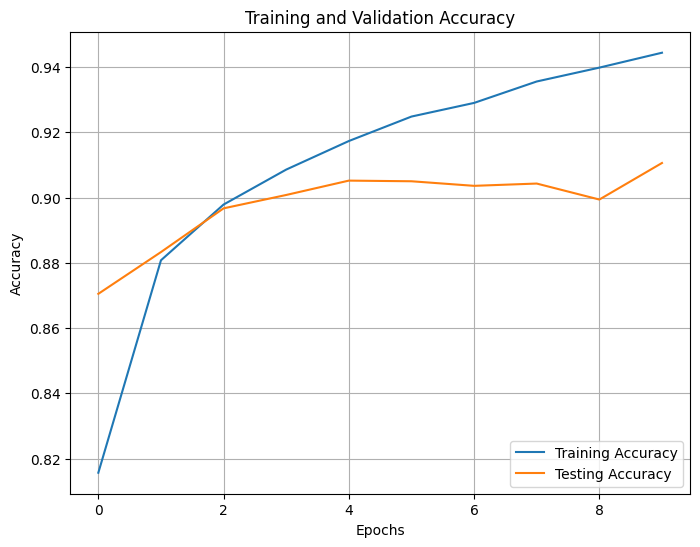

In [16]:
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

plot_accuracy(history)

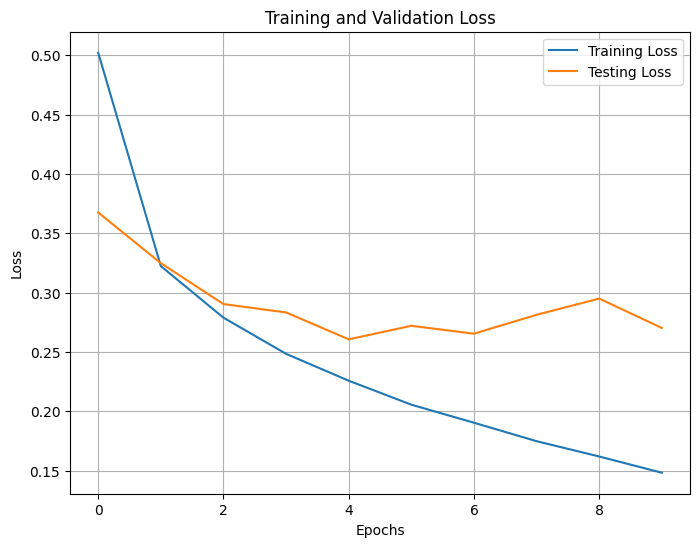

In [17]:
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Testing Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

plot_loss(history)
